In [18]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from PIL import Image


# Projeto 1 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: Pedro Araujo Cordeiro Viana   
## Matrícula: 202067452

# Questão 1

## Questão 1a (0.5 pontos)

O objetivo deste exercício é estudar a decimação e a interpolação de sinais. 
Escreva uma função em python que receba um sinal x[n] e retorne um sinal y[n] que seja a decimação por um fator de 2 do sinal de entrada x[n]. 

Em seguida, use a sua função para encontrar o sinal decimado para a entrada: 

$$ x = \left[1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0 \right]$$

In [19]:
x = [1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0]
x = np.array(x)
y = x[::2]


## Questão 1b (0.5 pontos)

Escreva uma função em python que receba um sinal y[n] e retorne um sinal z[n] que seja a interpolação por um fator de 2 do sinal de entrada y[n]. A sua função deve aumentar o número de amostras e assinalar um novo valor para as amostras criadas. Você pode escolher se as amostras interpoladas terão o valor médio das amostras ou o valor da amostra anterior. 

Em seguida, utilize a sua função para encontrar o sinal interpolado para o sinal y[n] da questão anterior (1a).


In [20]:
def interpol(y): 
   z = np.zeros([1,2*len(y)])[0] #Cria um array de zeros 2 vezes o tamanho da entrada
   for i in range(len(y)): 
      mult = i*2 #calcula o index vezes 2
      z[mult] = round(y[i],0) #define o z index 0 e o z equivalente a entrada decimada em 2
      if i != (len(y))-1: #limita a penúltima entrada
         med = (y[i+1] - y[i]) / 2 #calcula a média entre um entrada e a próxima
         z[mult+1] = round(z[mult] + med, 0) #soma a amostra anterior a média
      else:
         z[mult+1] = round(y[i],0) # define o último valor como a última entrada
   return z #retorna o array

print(interpol(x))

[1. 2. 2. 2. 1. 0. 0. 0. 1. 2. 2. 2. 1. 0. 0. 0. 1. 2. 2. 2. 1. 0. 0. 0.
 1. 2. 2. 2. 1. 0. 0. 0. 1. 2. 2. 2. 1. 0. 0. 0.]


## Questão 1c (1 ponto)

Uma imagem é um sinal discreto de duas dimensões. 
Escrevemos I(x,y) para representar esta imagem como uma matriz bidimensional de dimensões (w x h), onde w é a largura da imagem e h a sua altura.

Para imagens, fazemos a decimação e a interpolação separadamente, para todas as linhas e, em seguida, para todas as colunas (ou vice-versa), considerando que cada linha ou coluna é um sinal de uma dimensão.

Aplique o seu algoritmo de decimação sucessivamente até obter uma imagem com tamanho (w/16 x h/16), isto é, aplique o algoritmo 4 vezes seguidas, mostrando a imagem resultante.

In [21]:
from PIL import Image
im = Image.open("lena.bmp")  #o objeto im é da classe Image.
A = np.array(im)            #transformei o objeto Image para a classe np.array  
h, w = A.shape
print(f'Imagem original de tamanho: {h} x {w}')

im #por algum motivo desconhecido não printou a imagem

i = 0
while i != 4:
    A = A[::2,::2] #realiza a decimação em passos de 2 nas linhas e colunas, 4 vezes, totalizando 32x32 pixels
    i += 1

j, k = A.shape
im_dec = Image.fromarray(A) #Cria a imagem conforme o shape de A decimado
im_dec.save('im_dec_1_c.bmp')

im_dec #PROFESSOR: por algum motivo não está printando na célula mas é possível visualizar nos arquivos

print(f'Imagem decimada de tamanho: {j} x {k}')


Imagem original de tamanho: 512 x 512
Imagem decimada de tamanho: 32 x 32


## Questão 1d (1 ponto)

Utilizando como entrada a imagem decimada (de tamanho w/16 x h/16) da questão anterior (1c), aplique o seu algoritmo de interpolação sucessivamente até obter uma imagem com tamanho (w x h), isto é, aplique o algoritmo 4 vezes seguidas, mostrando a imagem resultante. Compare a imagem original com a imagem que foi decimada/interpolada. 

In [22]:
B = np.zeros([w,h]) #cria uma matriz de zeros 512x512 
c = 0
for v in A: #pega cada linha de A decimado (32x32)
    for s in range(4): #realiza a interpolação 4 vezes para o transformar em um vetor de shape 512
        v = interpol(v)
    B[c] = v #define o resultado da interpolação como uma linha de B
    c += 1 #passa para a próxima linha de B
c=0
Bt = B.transpose() #define a matriz transposta de B
for g in Bt: #percorre cada linha de B transposto que equivale as colunas de B
    g = g[:32] #retira os elementos nulos das linhas de B transposto ou das colunas de B
    for s in range(4): #realiza a interpolacao 4x
        g = interpol(g)
    B[c] = g #define o resultado de 512 elementos como uma linha de B transposto
    c += 1 #passa para a próxima linha de B

B = B.transpose() #tira a transposta de B
l, m = B.shape
B = np.array(np.round(B), dtype='uint8') #transforma os elementos em inteiros
im_int = Image.fromarray(B) #Cria a imagem conforme o shape de B
im_int.save('im_int_1_d.bmp') #salva a imagem
im_int #PROFESSOR novamente a imagem não esta sendo printada mas aparece nos arquivos
print(f'Imagem interpolada de tamanho: {l} x {m}')

#Por fim, acredito que o método de recuperação da imagem através de transpostas pode ter propagado
# algum erro na interpolação que acabou resultando em uma interpolação total insatisfatoria.
# Contudo, a decimaçao e interpolação saiu como esperado. tentei não utilizar a função linspace

/tmp/ipykernel_4269/1346632904.py:7: RuntimeWarning: overflow encountered in scalar subtract
  med = (y[i+1] - y[i]) / 2 #calcula a média entre um entrada e a próxima


Imagem interpolada de tamanho: 512 x 512


# Questão 2

Considere o seguinte sistema LDIT:
$$ y\left[n+2\right] + \frac{1}{6}y\left[n\right] = x\left[n+2\right] + 2x\left[n+1\right]+x\left[n\right] $$
$$ x\left[n\right] = \left(\frac{1}{4}\right)^n u\left[n\right] $$
$$ y\left[-1\right] = y\left[-2\right] = 0 $$

## Questão 2a (1 ponto)

Determine a resposta ao impulso h[n] analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

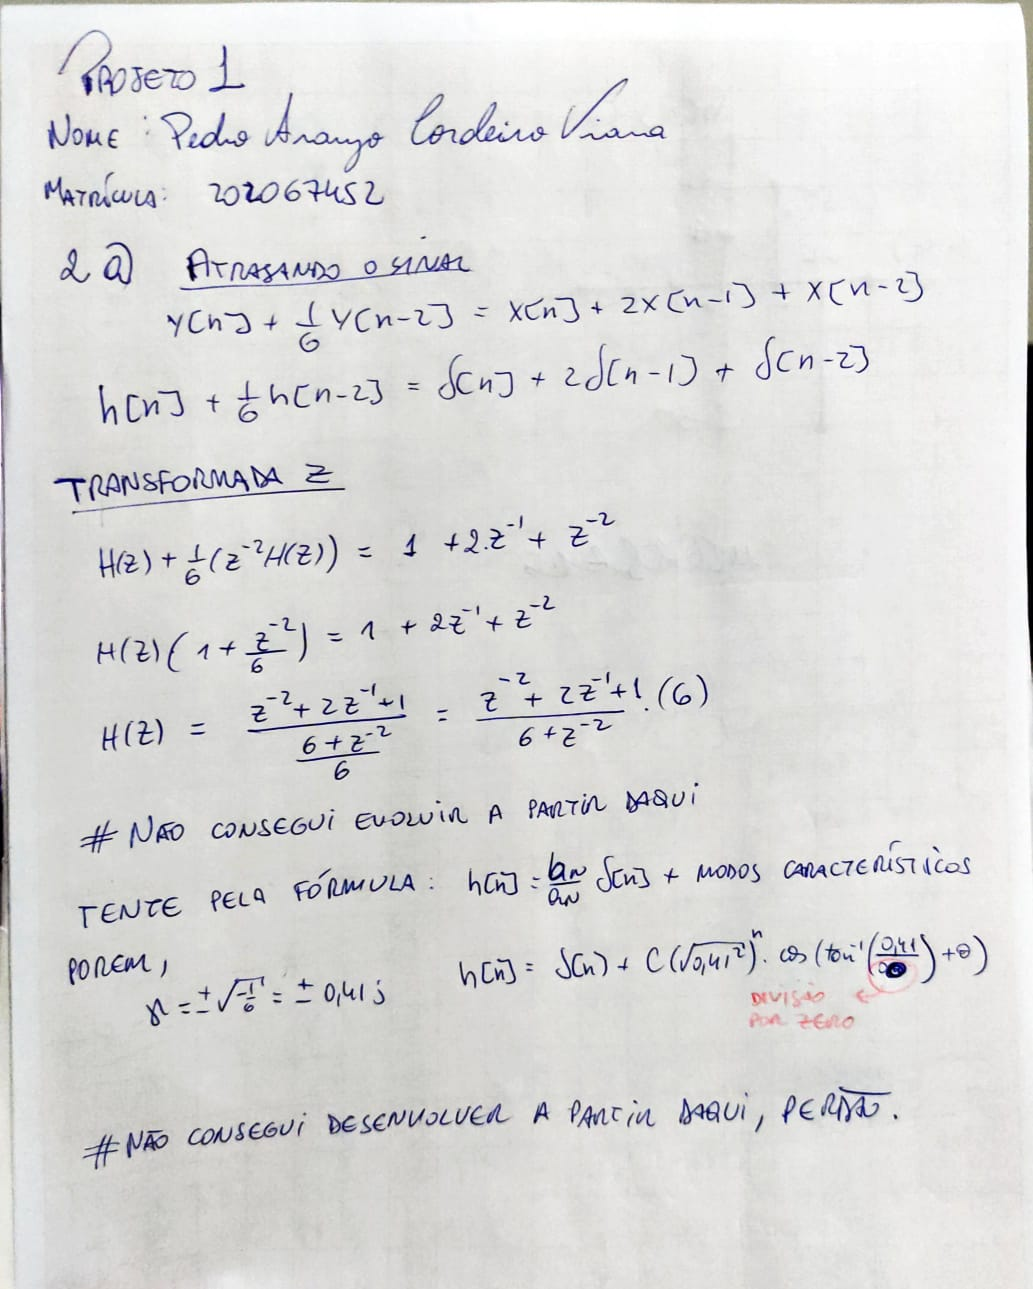

In [23]:


q2 = Image.open('questao_2a.jpeg')
q2



## Questão 2b (1 ponto)
Escreva um código para obter a resposta ao impulso h[n] iterativamente. Compare a resposta obtida iterativamente com a resposta analítica para as primeiras 100 amostras, plotando o gráfico das duas respostas.

Calcule também o erro médio quadrático entre os dois sinais, h[n] analítico e g[n] iterativo, através da equação:

$$ MSE = \frac{1}{N} \sum_{i=0}^{N-1} \left( h\left[i\right] - g\left[i\right] \right)^2 $$

onde N é o número de amostras considerado (no caso, 100 amostras).

In [24]:
def h2(n): #função resposta ao impulso da questão 2
    if n < 0:
        return 0
    else:
        return delta(n) + 2*delta(n-1) + delta(n-2) - (1/6)*h2(n-2)
def delta(n): #função delta de Dirac
    if n == 0:
        return 1
    else:
        return 0
    

## Questão 2c (1 ponto)

Determine a resposta do sistema às condições iniciais dadas analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

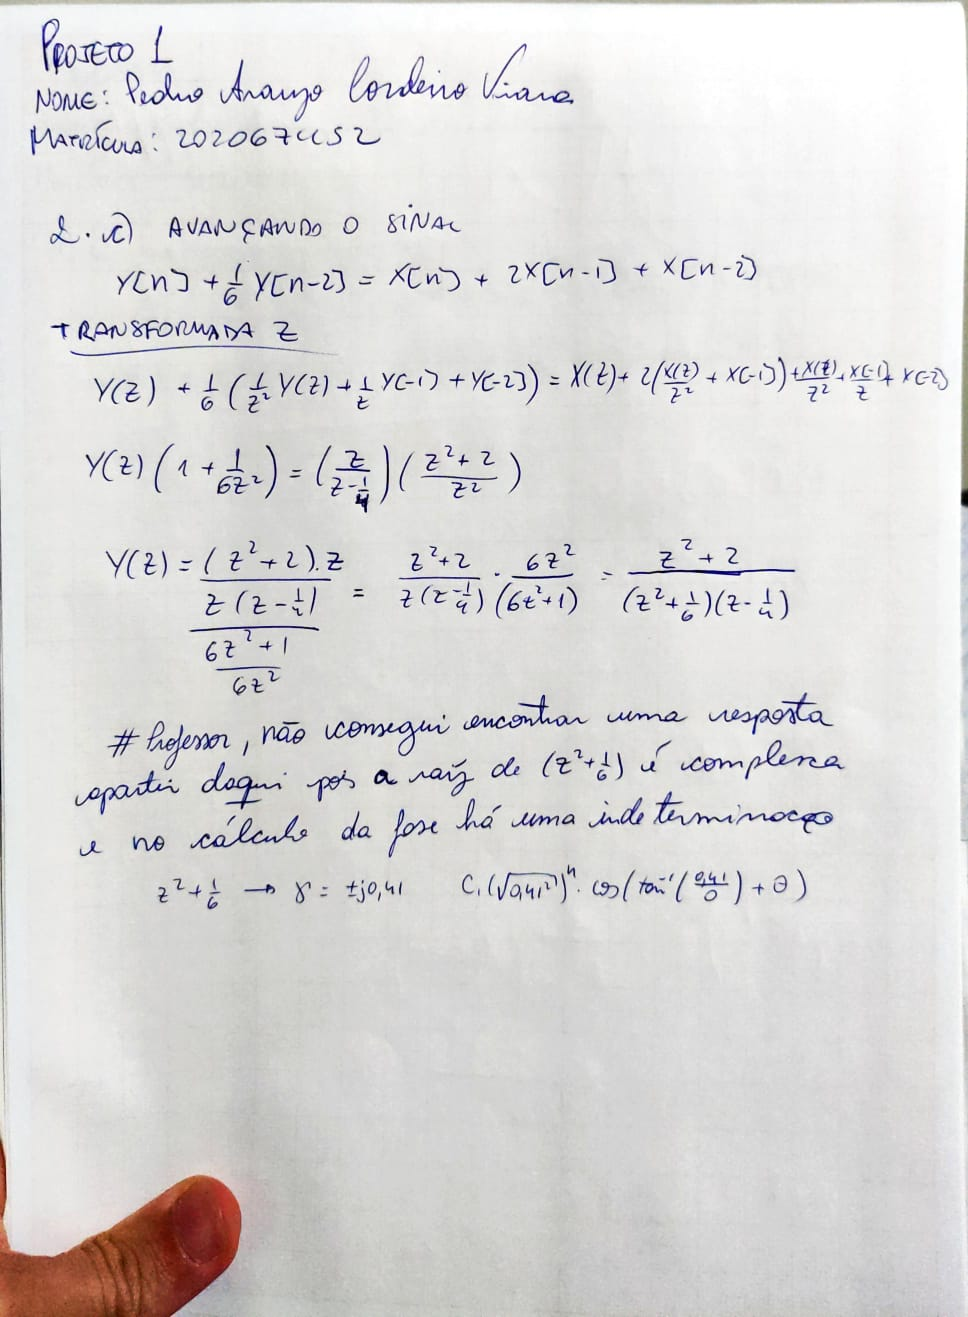

In [25]:

q2 = Image.open('questao_2c.jpeg')
q2


### Questão 2d (1 ponto)
Escreva um programa para obter a resposta do sistema através da convolução da entrada com a resposta ao impulso h[n] truncada para as primeiras 20 amostras (isto é, considerando apenas as primeiras 20 amostras de h[n]).

Compare a resposta obtida pela convolução com a resposta obtida analiticamente, plotando o gráfico das duas respostas (calcule as primeiras 100 amostras do sinal). Calcule também o erro médio quadrático entre os dois sinais.

In [26]:
def x2(n): #define a função da entrada da questão 2
    if n>=0:
        return (0.25)**n
    else:
        return 0

def resposta2(entrada): #calcula a resposta do sistema ao sinal de entrada
    saida = np.zeros([20])
    impulso = [] #cria uma lista para o impulso
    
    for n in range(20): #para cada uma das 20 amostras
        entrada[n] = x2(n)  #armazena os 20 primeiros elementos da entrada
        impulso.append(h2(n)) #armazena os 20 primeiros valores da resposta ao impulso
    impulso = impulso[::-1] #inverte o vetor da resposta ao impulso
    
    for m in range(20): #realiza a convolução pelo método da fita
        for l in range(len(impulso)): 
            if m == 0: #se for a primeira amostra apenas multiplica os primeiros valores
                saida[m] = impulso[m]*entrada[m] 
            elif l!=len(impulso): #se não for a última amostra, multiplica cada elemento do impulso pelos elementos nulos e não nulos correspondentes
                saida[m] += impulso[l]*entrada[m-l]
            else: #c.c. multiplica cada elemento do impulso pela entrada correspondente
                saida[m] += impulso[l]*entrada[m-l]
    return saida

entrada2 = np.zeros([20])
print(resposta2(entrada2)) 


[-1.98458060e-07  9.66499311e-02  2.41636735e-02  6.03794151e-03
  1.50234089e-03  3.93446447e-04  1.41228553e-04 -7.18602143e-05
 -2.75166700e-04  5.74212440e-04  1.68676299e-03 -3.43633394e-03
 -1.01183427e-02  2.06185625e-02  6.07101962e-02 -1.23711340e-01
 -3.64261168e-01  7.42268041e-01  2.18556701e+00  1.54639175e+00]


## Questão 2e (1 ponto)

Usando como entrada o sinal disponibilizado ('data_projeto1.mat'), determine a resposta do sistema. Plote o gráfico da entrada e da saída do sistema. 

In [27]:
### Códgio da Questão 2e
sinal = sp.io.loadmat('data_projeto1.mat')['sinal'].ravel()

Y = resposta2(sinal)
print(Y)


[-1.98458060e-07  5.62579709e+00  5.63997787e+00  5.65819206e+00
  5.66523868e+00  5.68574590e+00  5.69546359e+00  5.70975991e+00
  5.72697825e+00  5.73539321e+00  5.75322646e+00  5.76414776e+00
  5.78947543e+00  5.79479219e+00  5.75299900e+00  5.81586862e+00
  6.15886407e+00  5.88587915e+00  3.91558146e+00  1.54639175e+00]


# Questão 3
Considere o seguinte sistema LDIT:
$$ y\left[n+2\right] -2~\cos \left( \frac{\pi}{8} \right) y\left[n+1\right] + y\left[n\right] = x\left[n\right] $$

## Questão 3a (1 ponto)
Determine a resposta ao impulso h[n] analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

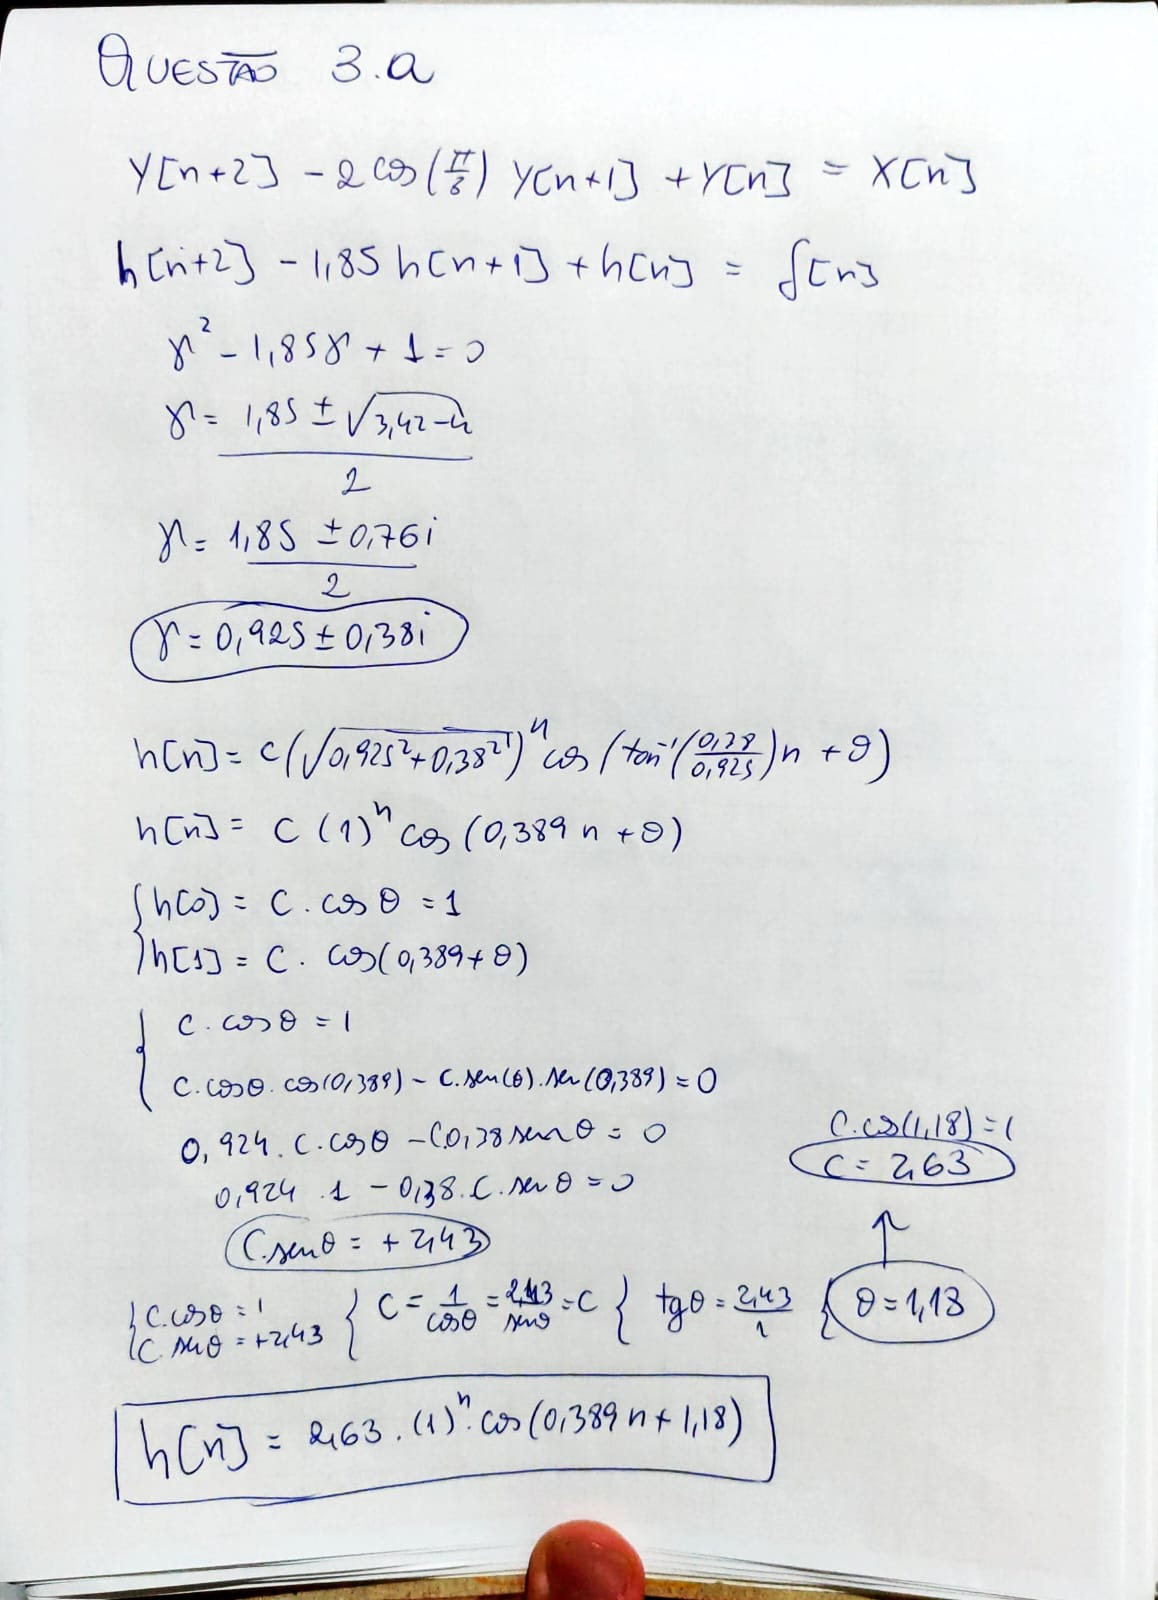

In [28]:
q3 = Image.open('questao_3a.jpeg')
q3


## Questão 3b (1 ponto)
Escreva um programa para obter a resposta ao impulso h[n] iterativamente. Compare a resposta obtida com a resposta analítica, plotando o gráfico das duas respostas para as primeiras 100 amostras. Calcule também o erro médio quadrático entre os dois sinais.

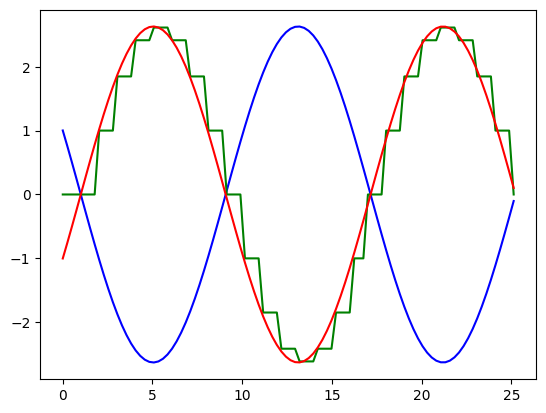

In [29]:
def h3(n): #resposta ao impulso unitário para a questão 3
    if n < 0:
        return 0
    else:
        return delta(n-2) - h3(n-2) + 2*np.cos((np.pi)/8)*h3(n-1) 
        


h = np.zeros([100]) #cria um array com 100 zeros
n = np.linspace(0, 8*np.pi, 100) #define um vetor de 100 entradas igualmente espaçadas entre 0 e 8*pi 
h3a = +2.63*np.cos(0.389*n + 1.18) #função relativa a resposta ao impulso encontrada analiticamente
h3a_corrigido = -2.63*np.cos(0.389*n + 1.18)  # notei que provavelmente a constante C está com sinal trocado
                                        #basta descomentar esta linha e testar
c = 0
for i in n: #define o array utilizando a função iterativa do impulso unitário
    h[c] = h3(int(i)) #discretiza o sinal
    c += 1

# Plota os gráficos    
plt.plot(n, h3a, color='blue')
plt.plot(n, h, color='green')
plt.plot(n, h3a_corrigido, color='red')
